# Problem Statement

You are a real estate manager, you need to determine which houses are likely to be sold within 3 months. You have a dataset including houses and their various attributes.

## Download Dataset

In [1]:
!wget https://drive.google.com/file/d/11D7Oc3fy2Qqz7TvOLXvzQaUpPUhHer8B/view?usp=sharing

--2021-12-03 11:26:08--  https://drive.google.com/file/d/11D7Oc3fy2Qqz7TvOLXvzQaUpPUhHer8B/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.124.100, 74.125.124.138, 74.125.124.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.124.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  65.24K  --.-KB/s    in 0.001s  

2021-12-03 11:26:08 (46.7 MB/s) - ‘view?usp=sharing’ saved [66805]



## 1. Data Preparation

In [ ]:
# pandas is a python library written for data mainpulation and analysis
import pandas as pd

In [ ]:
# read data from directory
df = pd.read_csv("/content/drive/MyDrive/RA work docs/intelligent systems/notebooks/House-Price.csv")

In [ ]:
# view the first five rows
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,10.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [ ]:
# remove non numeric columns
del df['waterbody']
del df['airport']
del df['bus_ter']


In [ ]:
# use the average distance
df['dist1'] = (df['dist1'] + df['dist2'] + df['dist3'] + df ['dist4'])/4
del df['dist2']
del df['dist3']
del df['dist4']

In [ ]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.0875,24.7,4.98,5.480,11.1920,23,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.9675,22.2,9.14,7.332,12.1728,42,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,4.9675,22.2,4.03,7.394,10.1200,38,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.0650,21.3,2.94,9.268,11.2672,45,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.0625,21.3,5.33,8.824,11.2896,55,0.039474,0


In [ ]:
# data description
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.795104,21.544466,12.653063,7.884150,12.861763,39.235178,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.105859,2.164946,7.141062,1.478005,3.474072,12.416295,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.127500,18.000000,1.730000,5.100000,10.057600,20.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.100625,19.800000,6.950000,6.628000,11.187800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.207500,20.950000,11.360000,7.977000,12.400000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.187500,22.600000,16.955000,9.076000,14.169400,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.127500,27.400000,37.970000,10.876000,81.120000,60.000000,0.086711,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# read all independent variables of into X
X = df.loc[:, df.columns != 'Sold']
# read the dependent variable  into y
y = df['Sold']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (379, 12)
X test shape:  (127, 12)
y train shape:  (379,)
y test shape:  (127,)


In [ ]:
# standardize the train sets
from sklearn import preprocessing
# X train scaler
scaler = preprocessing.StandardScaler().fit(X_train)
# X test scalser
scaler2 = preprocessing.StandardScaler().fit(X_test)

# transforming X 
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
print("train: ",X_train, "\n\n train standardized: ", X_train_s)

train:       price  resid_area  air_qual  ...  n_hot_rooms  rainfall     parks
245   18.5       35.86     0.431  ...      10.1480        59  0.043718
59    19.6       35.13     0.453  ...      14.1568        20  0.045900
276   33.2       36.41     0.447  ...      11.2656        35  0.042342
395   13.1       48.10     0.693  ...      15.1048        29  0.071122
416    7.5       48.10     0.679  ...      10.0600        35  0.064619
..     ...         ...       ...  ...          ...       ...       ...
323   18.5       37.38     0.493  ...      15.1480        25  0.050020
192   36.4       33.44     0.437  ...      11.2912        40  0.044716
117   19.2       40.01     0.547  ...      15.1536        28  0.060809
47    16.6       36.91     0.448  ...      12.1328        44  0.052566
172   23.1       34.05     0.510  ...      12.1848        38  0.052950

[379 rows x 12 columns] 

 train standardized:  [[-0.44249153 -0.74491444 -1.07873298 ... -0.71132638  1.63966054
  -1.01963698]
 [-0.32332

## 2. KNN

#### 2.3 Train KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=12
clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=12)

#### 2.2 Evaluation

In [ ]:
# make predictions
y_pred = clf_knn.predict(X_test_s)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


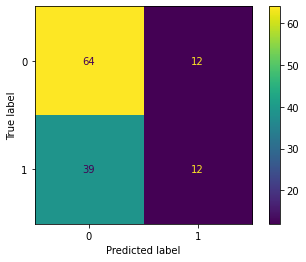

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf_knn,X_test, y_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6299212598425197

## 3. Decision Tree Regression

#### 3.1 Train Decision Tree Regressor

In [ ]:
from sklearn import tree

reg_tree = tree.DecisionTreeRegressor(max_depth=3)

reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

#### 3.2 Predictions

In [ ]:
y_train_pred_tree = reg_tree.predict(X_train)
y_test_pred_tree = reg_tree.predict(X_test)
y_test_pred_tree

array([0.58422939, 0.10869565, 0.58422939, 0.5       , 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.03703704, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.03703704, 0.        ,
       0.58422939, 0.58422939, 0.44444444, 0.58422939, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.58422939, 0.58422939,
       0.03703704, 0.58422939, 0.58422939, 0.10869565, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.58422939, 0.58422939,
       0.58422939, 0.58422939, 0.10869565, 0.58422939, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.03703704, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.03703704, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.10869565, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.58422939, 0.58422939,
       0.        , 0.58422939, 0.10869565, 0.58422939, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.58422939, 0.58422939,
       0.58422939, 0.58422939, 0.58422939, 0.58422939, 0.58422

#### 3.3 Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_test_pred_tree)

0.23363111177825382

In [ ]:
r2_score(y_train, y_train_pred_tree)

0.18576067440739497

In [ ]:
r2_score(y_test, y_test_pred_tree)

0.02780283749446444

#### 3.4 Decision Tree Visualization

In [ ]:
dot_data = tree.export_graphviz(reg_tree, out_file=None, feature_names=X_train.columns)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

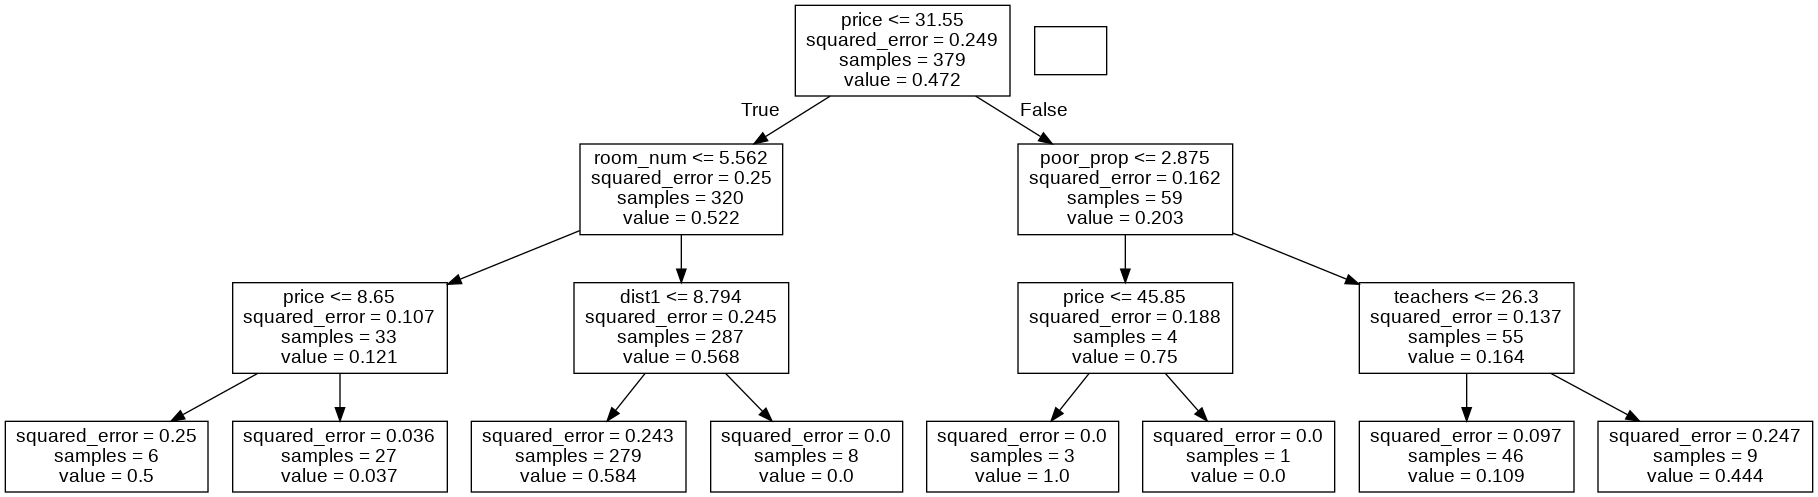

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 4. Decision Tree Classification

#### 4.1 Train Decision Tree classifier

In [ ]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(max_depth=4)
?tree.DecisionTreeClassifier

In [ ]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

#### 4.2 Make predictions

In [ ]:
y_train_pred_clf_tree = clf_tree.predict(X_train)
y_test_pred_clf_tree = clf_tree.predict(X_test)

In [ ]:
y_test_pred_clf_tree

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

#### 4.3 Visualization (Confusion Matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


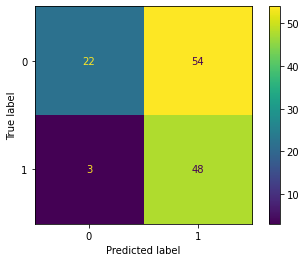

In [ ]:
plot_confusion_matrix(clf_tree, X_test, y_test)

#### 4.4 Accuracy Score

In [ ]:
accuracy_score(y_test, y_test_pred_clf_tree)

0.5511811023622047

#### 4.5 Visualization (Decision Tree)

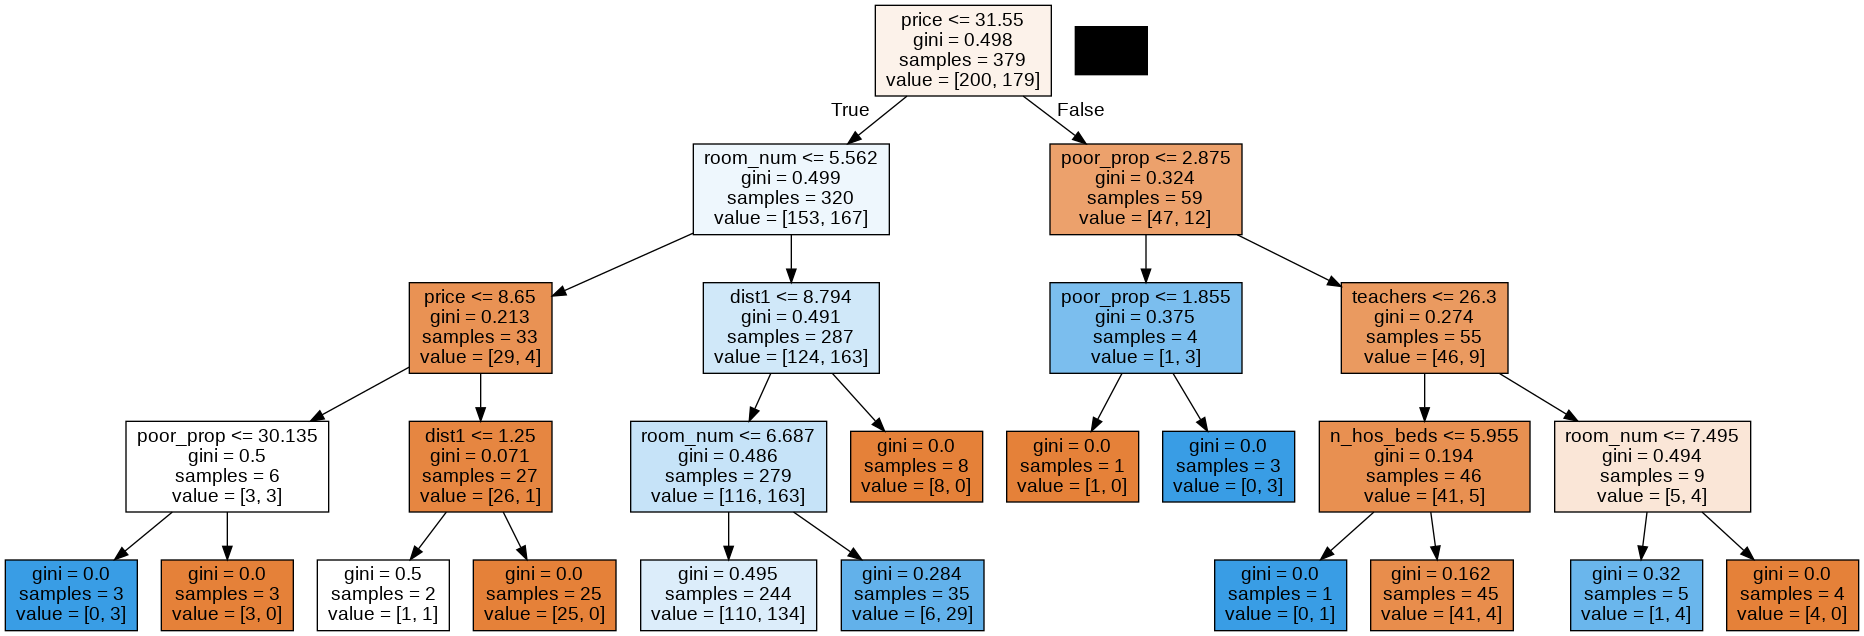

In [ ]:
dot_data2 = tree.export_graphviz(clf_tree, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data2)
Image(graph.create_png())